1. What is K-Nearest Neighbors (KNN) and how does it work?
KNN is a supervised learning algorithm used for classification and regression. It works by finding the K closest data points (neighbors) to a new input and making predictions based on the majority class (for classification) or average value (for regression) of those neighbors.

2. What is the difference between KNN Classification and KNN Regression?
 - KNN Classification is a supervised learning algorithm that classifies a new data point based on the majority class of its K nearest neighbors in the training data.It uses a distance metric (e.g., Euclidean) to find the closest data points and assigns the class that is most common among them.

 - KNN Regression is a supervised learning algorithm that predicts the numerical value of a target variable by averaging the target values of the K nearest neighbors.

It uses the same distance-based approach as classification, but the output is continuous, not categorical.

3. What is the role of the distance metric in KNN?
 - The distance metric determines how “close” one point is to another. Common metrics:

    - Euclidean Distance – default in most cases

    - Manhattan Distance – for grid-like data

    - Minkowski/Cosine Distance – for specific scenarios

    - Distance influences the neighbors selected and hence the final prediction.

4. What is the Curse of Dimensionality in KNN?
 - As the number of dimensions increases:

 - All data points become nearly equidistant.

 - The algorithm loses its ability to differentiate between near and far neighbors.

 - Model accuracy and efficiency decrease.

5. How can we choose the best value of K in KNN?
 - Use cross-validation to test multiple K values.

 - Plot an error curve vs. K.

    - Small K = low bias, high variance (overfitting);
    - Large K = high bias, low variance (underfitting).

6. What are KD Tree and Ball Tree in KNN?
  - KD Tree: Binary tree structure to partition space for fast nearest-neighbor lookup in low dimensions.

 - Ball Tree: Organizes points in balls (spheres), better for high-dimensional data.

7. When should you use KD Tree vs. Ball Tree?
 - KD Tree: Efficient for low-dimensional data (≤ 20 features).

 - Ball Tree: Preferred for high-dimensional datasets.

8. What are the disadvantages of KNN?
 - Slow prediction time for large datasets.

 - Sensitive to irrelevant features and outliers.

 - Requires feature scaling.

 - Affected by the curse of dimensionality.

9. How does feature scaling affect KNN?
 - KNN relies on distance. If features have different scales, one may dominate.
Use StandardScaler or MinMaxScaler to normalize feature values.

10. What is PCA (Principal Component Analysis)?
 - PCA is an unsupervised dimensionality reduction technique that transforms correlated features into a smaller set of uncorrelated variables called principal components, ordered by the amount of variance they capture.

11. How does PCA work?
 - Standardize data.

 - Compute covariance matrix.

 - Find eigenvalues and eigenvectors.

 - Select top components based on eigenvalues.

 - Transform the data onto a new subspace.

12. What is the geometric intuition behind PCA?
 - PCA finds new axes (principal components) along which the variance of data is maximized. These axes are orthogonal and represent directions of maximum spread in the dataset.

13. What is the difference between Feature Selection and Feature Extraction?
 - Method	Description
      - Feature Selection	Keeps original features (selects a subset)
      - Feature Extraction	Transforms data into new features (like PCA)

14. What are Eigenvalues and Eigenvectors in PCA?
 - Eigenvectors: Directions of principal components.

 - Eigenvalues: Measure of variance captured along each eigenvector.

15. How do you decide the number of components to keep in PCA?
 - Look at cumulative explained variance plot.

 - Retain enough components to capture 90–95% of variance.

 - Use Scree Plot or elbow method.

16. Can PCA be used for classification?
 - PCA itself is unsupervised, but it can be used before classification to:

 - Reduce dimensionality.

 - Improve speed.

17. What are the limitations of PCA?
 - Assumes linear relationships.

 - Sensitive to scaling.

 - Loss of interpretability of transformed components.

 - May discard useful information.

18. How do KNN and PCA complement each other?
 - PCA reduces dimensions → helps with the curse of dimensionality in KNN.

 - Improves KNN’s speed and accuracy in high-dimensional datasets.

19. How does KNN handle missing values in a dataset?
 - KNN does not inherently handle missing values.

 - Use KNN imputation: Replace missing values with weighted average of nearest neighbors.

20.
 - PCA (Principal Component Analysis) is an unsupervised dimensionality reduction technique that transforms original features into a new set of orthogonal components (principal components) that capture the maximum variance in the data, regardless of class labels.

 - LDA (Linear Discriminant Analysis) is a supervised dimensionality reduction and classification technique that projects the data in a way that maximizes the separation between multiple classes by maximizing the between-class variance and minimizing the within-class variance.





In [1]:
#Train a KNN Classifier on the Iris dataset and print model accuracy
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Accuracy: 1.0


In [3]:
#Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=4, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = KNeighborsRegressor()
model.fit(X_train, y_train)

print("MSE:", mean_squared_error(y_test, model.predict(X_test)))


MSE: 1717.4207137152803


In [2]:
#Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy
for metric in ['euclidean', 'manhattan']:
    model = KNeighborsClassifier(metric=metric)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{metric.capitalize()} Accuracy: {acc:.4f}")


Euclidean Accuracy: 1.0000
Manhattan Accuracy: 1.0000


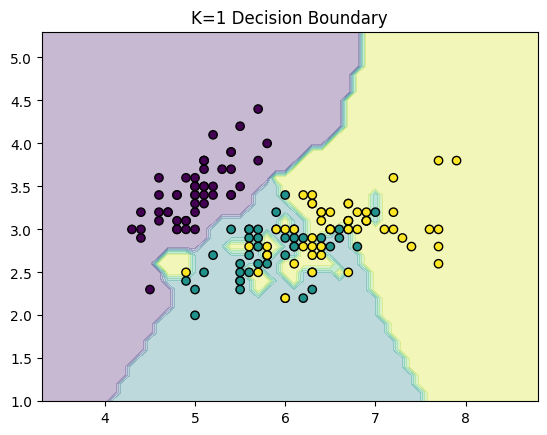

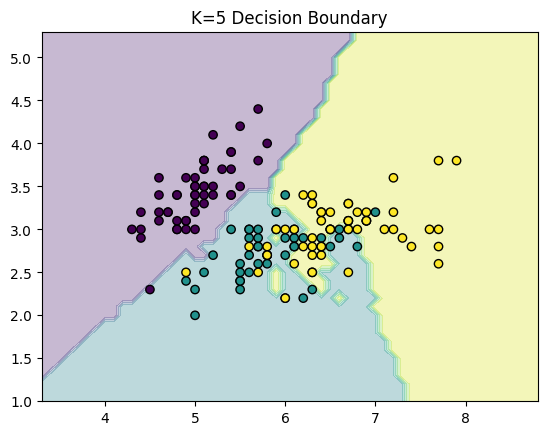

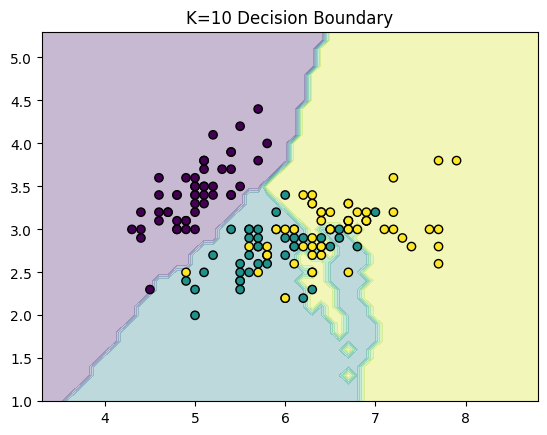

In [5]:
#Train a KNN Classifier with different values of K and visualize decision boundaried
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = load_iris()
X, y = data.data, data.target

X_vis = X[:, :2]  # Only two features for plotting
X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.3, random_state=42)

for k in [1, 5, 10]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k')
    plt.title(f"K={k} Decision Boundary")
    plt.show()

In [6]:
#Apply Feature Scaling before training a KNN model and compare results with unscaled data
from sklearn.preprocessing import StandardScaler

# Without scaling
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("Accuracy without scaling:", accuracy_score(y_test, model.predict(X_test)))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
print("Accuracy with scaling:", accuracy_score(y_test, model.predict(X_test_scaled)))


Accuracy without scaling: 0.7777777777777778
Accuracy with scaling: 0.8


In [7]:
#Train a PCA model on synthetic data and print the explained variance ratio for each component
from sklearn.decomposition import PCA

X_syn, _ = make_regression(n_samples=100, n_features=5, noise=0.5, random_state=42)
pca = PCA()
pca.fit(X_syn)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.26256655 0.21579693 0.20219416 0.18127308 0.13816928]


In [8]:
#Apply PCA before training a KNN Classifier and compare accuracy with and without PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print("Accuracy with PCA:", accuracy_score(y_test, model.predict(X_test)))


Accuracy with PCA: 1.0


In [9]:
# Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best K:", grid.best_params_)


Best K: {'n_neighbors': 5}


In [11]:
#Train a KNN Classifier and check the number of misclassified samples
model = KNeighborsClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

misclassified = (y_test != pred).sum()
print("Misclassified samples:", misclassified)


Misclassified samples: 0


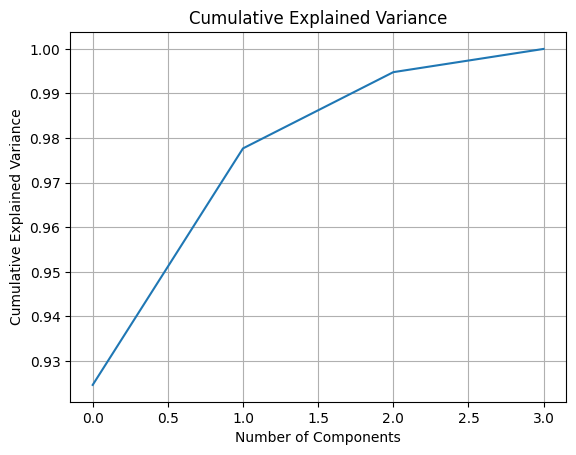

In [12]:
#Train a PCA model and visualize the cumulative explained variance
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title("Cumulative Explained Variance")
plt.grid(True)
plt.show()


In [13]:
#Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare
#accuracy
for weight in ['uniform', 'distance']:
    model = KNeighborsClassifier(weights=weight)
    model.fit(X_train, y_train)
    print(f"{weight.capitalize()} Weight Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Uniform Weight Accuracy: 1.0
Distance Weight Accuracy: 1.0


In [14]:
#Train a KNN Regressor and analyze the effect of different K values on performance
for k in [1, 3, 5, 7, 9]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    print(f"K={k}, MSE={mean_squared_error(y_test, model.predict(X_test)):.4f}")


K=1, MSE=0.0444
K=3, MSE=0.0099
K=5, MSE=0.0053
K=7, MSE=0.0113
K=9, MSE=0.0140


In [16]:
#Implement KNN Imputation for handling missing values in a dataset4
import numpy as np
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

X_missing = X.copy()
X_missing[np.random.randint(0, 150, 10), 0] = np.nan  # introduce missing values
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_missing)
print("Missing values handled with KNN Imputer.")


Missing values handled with KNN Imputer.


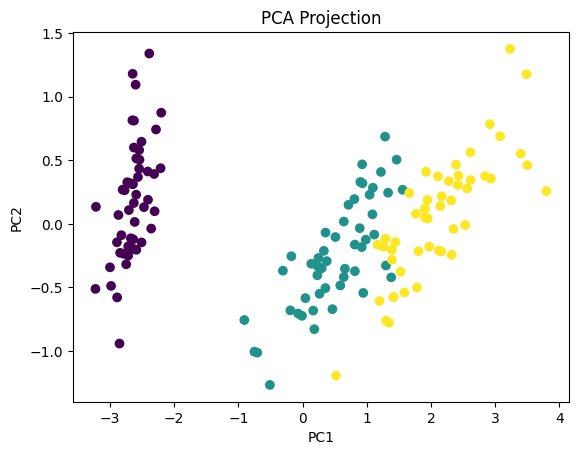

In [17]:
#4 Train a PCA model and visualize the data projection onto the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA Projection")
plt.show()


In [18]:
#Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance
for algo in ['kd_tree', 'ball_tree']:
    model = KNeighborsClassifier(algorithm=algo)
    model.fit(X_train, y_train)
    print(f"{algo} Accuracy:", accuracy_score(y_test, model.predict(X_test)))


kd_tree Accuracy: 1.0
ball_tree Accuracy: 1.0


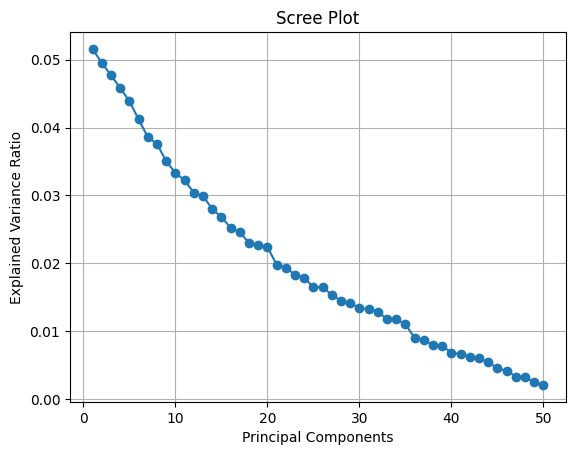

In [19]:
#Train a PCA model on a high-dimensional dataset and visualize the Scree plot
X_hd, _ = make_regression(n_samples=100, n_features=50, noise=0.2)
pca = PCA().fit(X_hd)

plt.plot(range(1, 51), pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()


In [20]:
#Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [21]:
#Train a PCA model and analyze the effect of different numbers of components on accuracy
for n in [1, 2, 3, 4]:
    X_pca = PCA(n_components=n).fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    print(f"PCA Components: {n}, Accuracy: {accuracy_score(y_test, model.predict(X_test))}")


PCA Components: 1, Accuracy: 0.9777777777777777
PCA Components: 2, Accuracy: 1.0
PCA Components: 3, Accuracy: 1.0
PCA Components: 4, Accuracy: 1.0


In [22]:
#Train a KNN Classifier with different leaf_size values and compare accuracy
for leaf in [10, 20, 30, 50]:
    model = KNeighborsClassifier(leaf_size=leaf)
    model.fit(X_train, y_train)
    print(f"Leaf Size: {leaf}, Accuracy: {accuracy_score(y_test, model.predict(X_test))}")


Leaf Size: 10, Accuracy: 1.0
Leaf Size: 20, Accuracy: 1.0
Leaf Size: 30, Accuracy: 1.0
Leaf Size: 50, Accuracy: 1.0


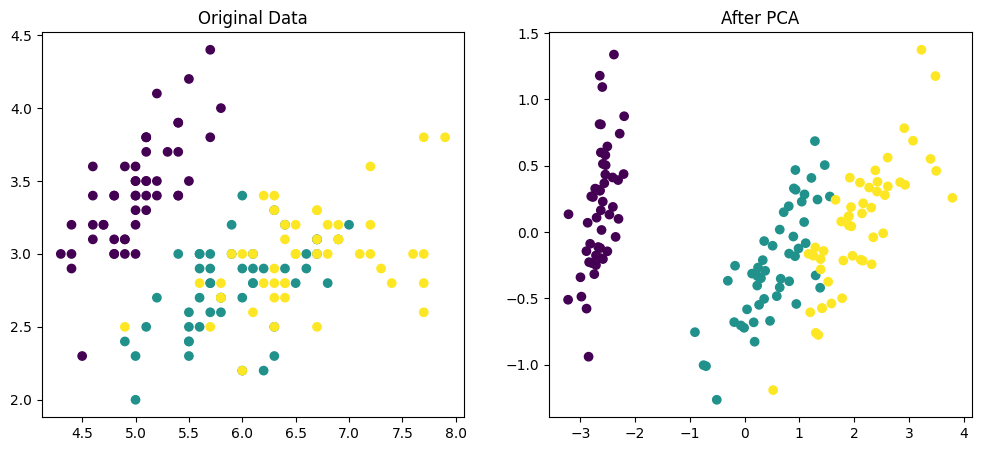

In [23]:
#Train a PCA model and visualize how data points are transformed before and after PCA
X_pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Original Data")

plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.title("After PCA")

plt.show()


In [24]:
#Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report

wine = load_wine()
X_w, y_w = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X_w, y_w, test_size=0.3, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



In [25]:
#Train a KNN Regressor and analyze the effect of different distance metrics on prediction error
for metric in ['euclidean', 'manhattan']:
    model = KNeighborsRegressor(metric=metric)
    model.fit(X_train, y_train)
    print(f"{metric} MSE: {mean_squared_error(y_test, model.predict(X_test)):.4f}")


euclidean MSE: 0.2326
manhattan MSE: 0.1763


In [26]:
#Train a KNN Classifier and evaluate using ROC-AUC score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y, classes=[0, 1, 2])
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_score = model.predict_proba(X_test)
print("ROC-AUC Score (macro):", roc_auc_score(label_binarize(y_test, classes=[0,1,2]), y_score, average='macro', multi_class='ovr'))


ROC-AUC Score (macro): 0.8929778676489203


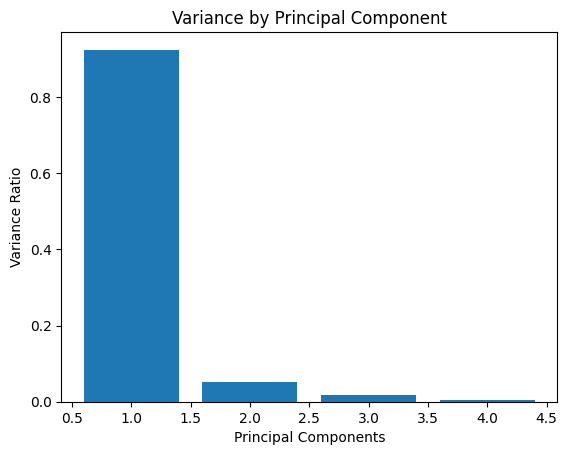

In [27]:
#Train a PCA model and visualize the variance captured by each principal component
pca = PCA().fit(X)
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")
plt.title("Variance by Principal Component")
plt.show()


In [28]:
#Train a KNN Classifier and perform feature selection before training
from sklearn.feature_selection import SelectKBest, f_classif

X_new = SelectKBest(score_func=f_classif, k=2).fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("Accuracy after feature selection:", accuracy_score(y_test, model.predict(X_test)))


Accuracy after feature selection: 1.0


In [29]:
#Train a PCA model and visualize the data reconstruction error after reducing dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_pca)
reconstruction_error = np.mean((X - X_reconstructed) ** 2)
print("Reconstruction Error:", reconstruction_error)


Reconstruction Error: 0.02534107393239825


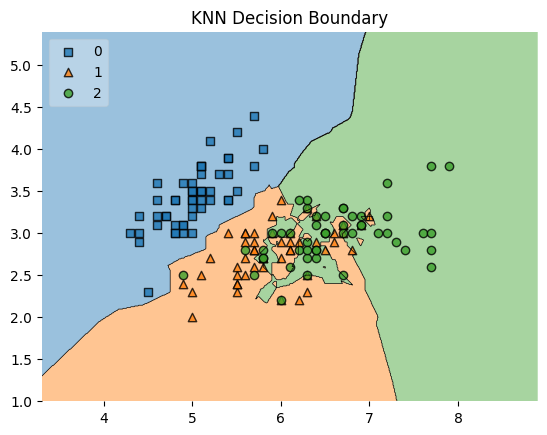

In [30]:
#Train a KNN Classifier and visualize the decision boundary
from mlxtend.plotting import plot_decision_regions

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_vis, y)
plot_decision_regions(X=X_vis, y=y, clf=model, legend=2)
plt.title("KNN Decision Boundary")
plt.show()


In [31]:
# Train a PCA model and analyze the effect of different numbers of components on data variance
for n in range(1, 5):
    pca = PCA(n_components=n)
    pca.fit(X)
    print(f"Components: {n}, Explained Variance: {np.sum(pca.explained_variance_ratio_):.4f}")


Components: 1, Explained Variance: 0.9246
Components: 2, Explained Variance: 0.9777
Components: 3, Explained Variance: 0.9948
Components: 4, Explained Variance: 1.0000
